# 技术分析策略和交易系统—布林带指标

In [1]:
import numpy as np
import pandas as pd
import talib as ta
import tushare as ts
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# 确保‘-’号显示正常
mpl.rcParams['axes.unicode_minus']=False
# 确保中文显示正常
mpl.rcParams['font.sans-serif'] = ['SimHei']  

### 1. 数据准备

In [2]:
# 获取数据
stock_index = ts.get_k_data('hs300', '2016-01-01', '2017-07-01')
# 将date设置为index
stock_index['date'] = pd.to_datetime(stock_index['date'])
stock_index.set_index('date', inplace = True)
stock_index.head()

,open,close,high,low,volume,code
date,,,,,,
2016-01-04,3725.86,3470.41,3726.25,3469.01,115370674.0,hs300
2016-01-05,3382.18,3478.78,3518.22,3377.28,162116984.0,hs300
2016-01-06,3482.41,3539.81,3543.74,3468.47,145966144.0,hs300
2016-01-07,3481.15,3294.38,3481.15,3284.74,44102641.0,hs300
2016-01-08,3371.87,3361.56,3418.85,3237.93,185959451.0,hs300


In [ ]:
ta.BBANDS?

In [3]:
# 计算bolling线
stock_index['upper'], stock_index['middle'], stock_index['lower'] = ta.BBANDS(np.asarray(stock_index['close']),
                                                     timeperiod=20, nbdevup=2, nbdevdn=2, matype=0)

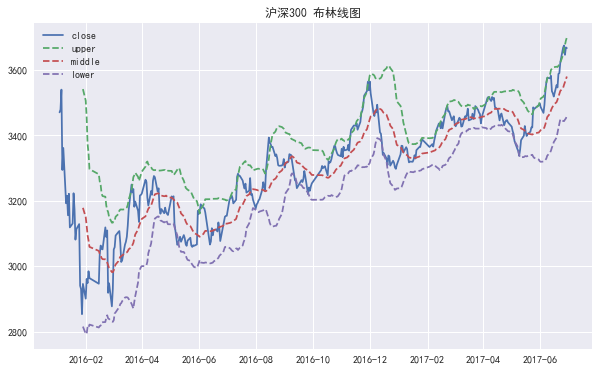

In [4]:
# 绘图
fig = plt.figure(figsize = (10,6))
plt.plot(stock_index['close'])
plt.plot(stock_index['upper'], linestyle='--')
plt.plot(stock_index['middle'], linestyle='--')
plt.plot(stock_index['lower'], linestyle='--')
plt.title('沪深300 布林线图')
plt.legend()

#### 2. 交易信号和持仓信号计算(分开计算)

In [5]:
# 计算昨日数据
stock_index['yes_close'] = stock_index['close'].shift(1)
stock_index['yes_lower'] = stock_index['lower'].shift(1)
stock_index['yes_upper'] = stock_index['upper'].shift(1)
# 计算前天数据
stock_index['daybeforeyes_close'] = stock_index['close'].shift(2)
stock_index['daybeforeyes_lower'] = stock_index['lower'].shift(2)
stock_index['daybeforeyes_upper'] = stock_index['upper'].shift(2)

In [6]:
stock_index.tail()

,open,close,high,low,volume,code,upper,middle,lower,yes_close,yes_lower,yes_upper,daybeforeyes_close,daybeforeyes_lower,daybeforeyes_upper
date,,,,,,,,,,,,,,,
2017-06-26,3627.02,3668.09,3671.94,3627.02,134637995.0,hs300,3645.868371,3544.9575,3444.046629,3622.88,3449.111649,3622.560351,3590.34,3435.873927,3615.927073
2017-06-27,3665.58,3674.72,3676.53,3648.76,97558702.0,hs300,3665.759441,3554.6720,3443.584559,3668.09,3444.046629,3645.868371,3622.88,3449.111649,3622.560351
2017-06-28,3664.16,3646.17,3672.19,3644.03,97920858.0,hs300,3676.424921,3562.3365,3448.248079,3674.72,3443.584559,3665.759441,3668.09,3444.046629,3645.868371
2017-06-29,3649.25,3668.83,3669.13,3644.73,85589498.0,hs300,3689.874534,3570.8910,3451.907466,3646.17,3448.248079,3676.424921,3674.72,3443.584559,3665.759441
2017-06-30,3654.73,3666.80,3669.76,3646.23,81510028.0,hs300,3699.269285,3579.9055,3460.541715,3668.83,3451.907466,3689.874534,3646.17,3448.248079,3676.424921


In [7]:
# 计算交易信号
# 开多信号:前天收盘价低于下轨，昨日收盘价高于下轨
stock_index['signal'] = np.where(np.logical_and(
                             stock_index['daybeforeyes_close'] < stock_index['daybeforeyes_lower'],
                             stock_index['yes_close'] > stock_index['yes_lower']),
                             1, 0)
# 开空信号：前天日收盘价高于上轨，昨日收盘价低于上轨
stock_index['signal'] = np.where(np.logical_and(
                             stock_index['daybeforeyes_close'] > stock_index['daybeforeyes_upper'],
                             stock_index['yes_close'] < stock_index['yes_upper']),
                             -1, stock_index['signal'])

In [8]:
stock_index.tail()

,open,close,high,low,volume,code,upper,middle,lower,yes_close,yes_lower,yes_upper,daybeforeyes_close,daybeforeyes_lower,daybeforeyes_upper,signal
date,,,,,,,,,,,,,,,,
2017-06-26,3627.02,3668.09,3671.94,3627.02,134637995.0,hs300,3645.868371,3544.9575,3444.046629,3622.88,3449.111649,3622.560351,3590.34,3435.873927,3615.927073,0
2017-06-27,3665.58,3674.72,3676.53,3648.76,97558702.0,hs300,3665.759441,3554.6720,3443.584559,3668.09,3444.046629,3645.868371,3622.88,3449.111649,3622.560351,0
2017-06-28,3664.16,3646.17,3672.19,3644.03,97920858.0,hs300,3676.424921,3562.3365,3448.248079,3674.72,3443.584559,3665.759441,3668.09,3444.046629,3645.868371,0
2017-06-29,3649.25,3668.83,3669.13,3644.73,85589498.0,hs300,3689.874534,3570.8910,3451.907466,3646.17,3448.248079,3676.424921,3674.72,3443.584559,3665.759441,-1
2017-06-30,3654.73,3666.80,3669.76,3646.23,81510028.0,hs300,3699.269285,3579.9055,3460.541715,3668.83,3451.907466,3689.874534,3646.17,3448.248079,3676.424921,0


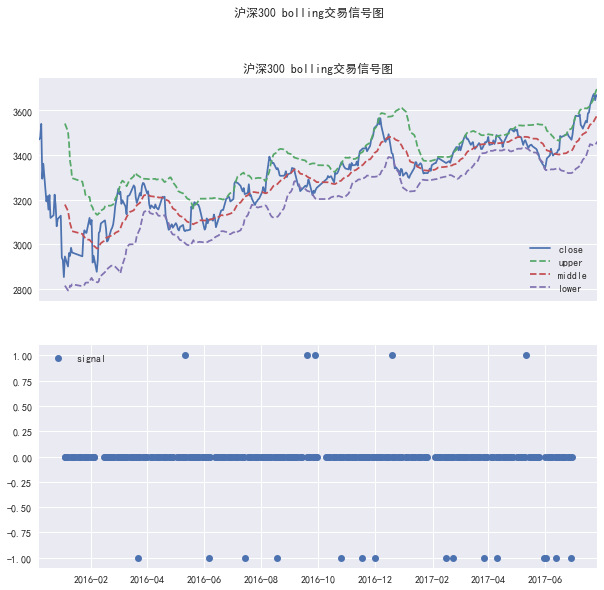

In [9]:
# 绘制交易信号图
plt.subplot(2,1,1)
plt.title('沪深300 bolling交易信号图')
plt.gca().axes.get_xaxis().set_visible(False)
stock_index['close'].plot(figsize=(10,10))
plt.plot(stock_index['upper'], linestyle='--')
plt.plot(stock_index['middle'], linestyle='--')
plt.plot(stock_index['lower'], linestyle='--')
plt.legend()
plt.subplot(2,1,2)
plt.plot(stock_index['signal'], marker='o', linestyle='')
plt.legend()
plt.suptitle('沪深300 bolling交易信号图')
# plt.show()

In [ ]:
# 使用position标记持仓情况，全新的循环法思路；
position = 0
# 对每个交易日进行循环    
for item in stock_index.iterrows():   #逐行遍历；返回的这个item其实一个元组，（label，series）
    # 判断交易信号
    if item[1]['signal'] == 1:
        # 交易信号为1，则记录仓位为1，持有多仓；
        position = 1
    elif item[1]['signal'] == -1:
        # 交易信号为-1， 则记录仓位为-1，持有空仓；
        position = -1
    else:
        pass     #啥都不做；
    # 记录每日持仓情况
    stock_index.loc[item[0], 'position'] = position      #自动往下填充的就是上一个产生的交易信号；关键；

In [10]:
# 使用position标记持仓情况，全新的循环法思路；另外一种方法；
position = 0
# 对每个交易日进行循环    
for i, item in stock_index.iterrows():   #逐行遍历；这里item就是一个Series； unpacked
    # 判断交易信号
    if item['signal'] == 1:
        # 交易信号为1，则记录仓位为1，持有多仓；
        position = 1
    elif item['signal'] == -1:
        # 交易信号为-1， 则记录仓位为-1，持有空仓；
        position = -1
    else:
        pass
    # 记录每日持仓情况
    stock_index.loc[i, 'position'] = position      #在DataFrame中自动往下填充的就是上一个产生的交易信号；关键；

In [11]:
stock_index.tail()

,open,close,high,low,volume,code,upper,middle,lower,yes_close,yes_lower,yes_upper,daybeforeyes_close,daybeforeyes_lower,daybeforeyes_upper,signal,position
date,,,,,,,,,,,,,,,,,
2017-06-26,3627.02,3668.09,3671.94,3627.02,134637995.0,hs300,3645.868371,3544.9575,3444.046629,3622.88,3449.111649,3622.560351,3590.34,3435.873927,3615.927073,0,-1.0
2017-06-27,3665.58,3674.72,3676.53,3648.76,97558702.0,hs300,3665.759441,3554.6720,3443.584559,3668.09,3444.046629,3645.868371,3622.88,3449.111649,3622.560351,0,-1.0
2017-06-28,3664.16,3646.17,3672.19,3644.03,97920858.0,hs300,3676.424921,3562.3365,3448.248079,3674.72,3443.584559,3665.759441,3668.09,3444.046629,3645.868371,0,-1.0
2017-06-29,3649.25,3668.83,3669.13,3644.73,85589498.0,hs300,3689.874534,3570.8910,3451.907466,3646.17,3448.248079,3676.424921,3674.72,3443.584559,3665.759441,-1,-1.0
2017-06-30,3654.73,3666.80,3669.76,3646.23,81510028.0,hs300,3699.269285,3579.9055,3460.541715,3668.83,3451.907466,3689.874534,3646.17,3448.248079,3676.424921,0,-1.0


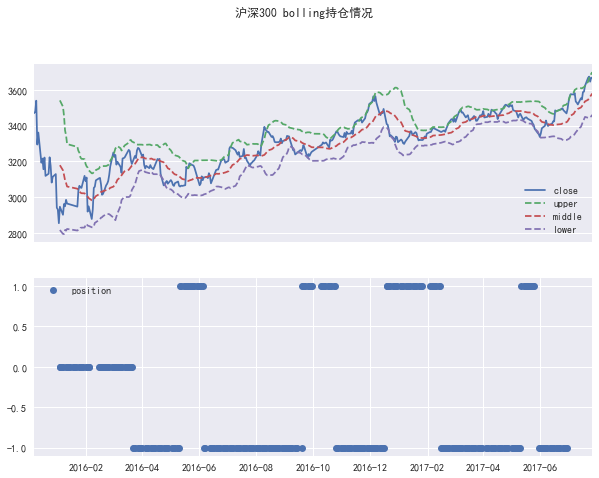

In [12]:
# 绘制持仓情况图
plt.subplot(2,1,1)
plt.gca().axes.get_xaxis().set_visible(False)
stock_index['close'].plot(figsize=(10,8))
plt.plot(stock_index['upper'], linestyle='--')
plt.plot(stock_index['middle'], linestyle='--')
plt.plot(stock_index['lower'], linestyle='--')
plt.legend()
plt.subplot(2,1,2)
plt.plot(stock_index['position'], marker='o', linestyle='')
plt.legend()
plt.suptitle('沪深300 bolling持仓情况')

#### 3. 计算策略收益及可视化

In [13]:
# 计算股票每日收益率
stock_index['pct_change'] = stock_index['close'].pct_change()
# 计算股票的累积收益率
stock_index['return'] = (stock_index['pct_change'] + 1).cumprod()
# 计算策略每日收益率
stock_index['strategy_return'] = stock_index['position'] * stock_index['pct_change']
# 计算策略累积收益率
stock_index['cum_strategy_return'] = (stock_index['strategy_return'] + 1).cumprod()

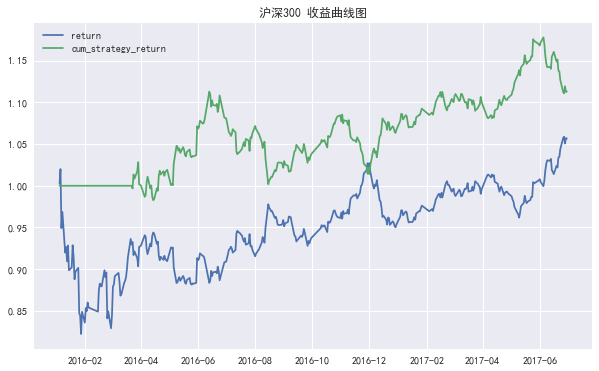

In [14]:
# 绘图
fig = plt.figure(figsize = (10,6))
plt.plot(stock_index['return'])
plt.plot(stock_index['cum_strategy_return'])
plt.title('沪深300 收益曲线图')
plt.legend(loc='upper left')
plt.show()

声明：本资料仅供内部学习交流使用，切勿外传。